In [1]:
import unicodedata
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import seaborn.objects as so

Reading and data manipulation

In [2]:
results = pd.read_csv("./lit_review_analysis.csv", sep=";")
results

,Number,Identifier,Title,Author,Journal_Book,Year,Offline Explanation Acessment,Offline Explanation Metric,Number of Users,User Experiment,User Experiment Metrics,Explanation Source,Agnostic Or Post-Hoc
0,1,takami_flanagan_dai_ogata_2023,Personality-based tailored explainable recomme...,"Takami, Kyosuke; Flanagan, Brendan; Dai, Yilin...",Smart Learning Environments,2023,No,-,-,Yes,A/B CTR(online),Personality,Post-Hoc
1,2,lin_zhang_lin_zeng_zhou_wu_2024,Knowledge-aware reasoning with self-supervised...,"Lin, Yuanguo; Zhang, Wei; Lin, Fan; Zeng, Wenh...",Neural Computing and Applications,2024,Yes,Explainable Items,All dataset,No,-,KG,Intrinsic
2,3,zanon_da_rocha_manzato_2024,Model-Agnostic Knowledge Graph Embedding Expla...,"Zanon, André Levi; Da Rocha, Leonardo Chaves D...",Communications in Computer and Information Sci...,2024,Yes,KG,All dataset,No,-,KG,Post-Hoc
3,4,samih_ghadi_fennan_2023,Knowledge Embeddings for Explainable Recommend...,"Samih, Amina; Ghadi, Abderrahim; Fennan, Abdel...",Lecture Notes in Networks and Systems,2023,Yes,PoC,Few Examples,No,-,KG,Post-Hoc
4,5,li_liu_zhang_kou_liu_qu_2025,Integrating User Sentiment and Behavior for Ex...,"Li, Dong; Liu, Zhicong; Zhang, Qingyu; Kou, Yu...",Communications in Computer and Information Sci...,2025,Yes,Precision/Recall,Few Examples,No,-,Review,Post-Hoc
...,...,...,...,...,...,...,...,...,...,...,...,...,...
100,101,10.1145/3340531.3411992,Generate Neural Template Explanations for Reco...,"Li, Lei and Zhang, Yongfeng and Chen, Li",ACM International Conference on Information an...,2020,Yes,NLP(BLEU/ROUGE),All dataset,No,-,Review,Intrinsic
101,102,10.1145/3292500.3330989,KGAT: Knowledge Graph Attention Network for Re...,"Wang, Xiang and He, Xiangnan and Cao, Yixin an...",ACM International Conference on Information an...,2019,Yes,PoC,Few Examples,No,-,KG,Intrinsic
102,103,10.1145/3351095.3372852,Effect of confidence and explanation on accura...,"Zhang, Yunfeng and Liao, Q. Vera and Bellamy, ...","Conference on Fairness, Accountability, and Tr...",2020,No,-,-,Yes,A/B CTR(online),Parameters,Post-Hoc
103,104,10.1145/2806416.2806504,TriRank: Review-aware Explainable Recommendati...,"He, Xiangnan and Chen, Tao and Kan, Min-Yen an...",ACM International Conference on Information an...,2015,Yes,PoC,Few Examples,No,-,Review,Intrinsic


In [3]:
results = results.drop_duplicates(subset=results.columns.difference(['Number', 'Author']))
results

,Number,Identifier,Title,Author,Journal_Book,Year,Offline Explanation Acessment,Offline Explanation Metric,Number of Users,User Experiment,User Experiment Metrics,Explanation Source,Agnostic Or Post-Hoc
0,1,takami_flanagan_dai_ogata_2023,Personality-based tailored explainable recomme...,"Takami, Kyosuke; Flanagan, Brendan; Dai, Yilin...",Smart Learning Environments,2023,No,-,-,Yes,A/B CTR(online),Personality,Post-Hoc
1,2,lin_zhang_lin_zeng_zhou_wu_2024,Knowledge-aware reasoning with self-supervised...,"Lin, Yuanguo; Zhang, Wei; Lin, Fan; Zeng, Wenh...",Neural Computing and Applications,2024,Yes,Explainable Items,All dataset,No,-,KG,Intrinsic
2,3,zanon_da_rocha_manzato_2024,Model-Agnostic Knowledge Graph Embedding Expla...,"Zanon, André Levi; Da Rocha, Leonardo Chaves D...",Communications in Computer and Information Sci...,2024,Yes,KG,All dataset,No,-,KG,Post-Hoc
3,4,samih_ghadi_fennan_2023,Knowledge Embeddings for Explainable Recommend...,"Samih, Amina; Ghadi, Abderrahim; Fennan, Abdel...",Lecture Notes in Networks and Systems,2023,Yes,PoC,Few Examples,No,-,KG,Post-Hoc
4,5,li_liu_zhang_kou_liu_qu_2025,Integrating User Sentiment and Behavior for Ex...,"Li, Dong; Liu, Zhicong; Zhang, Qingyu; Kou, Yu...",Communications in Computer and Information Sci...,2025,Yes,Precision/Recall,Few Examples,No,-,Review,Post-Hoc
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99,100,10.1145/2766462.2767755,Image-Based Recommendations on Styles and Subs...,"McAuley, Julian and Targett, Christopher and S...",ACM SIGIR Conference on Research and Developme...,2015,Yes,PoC,Few Examples,No,-,Multimodal,Intrinsic
100,101,10.1145/3340531.3411992,Generate Neural Template Explanations for Reco...,"Li, Lei and Zhang, Yongfeng and Chen, Li",ACM International Conference on Information an...,2020,Yes,NLP(BLEU/ROUGE),All dataset,No,-,Review,Intrinsic
101,102,10.1145/3292500.3330989,KGAT: Knowledge Graph Attention Network for Re...,"Wang, Xiang and He, Xiangnan and Cao, Yixin an...",ACM International Conference on Information an...,2019,Yes,PoC,Few Examples,No,-,KG,Intrinsic
102,103,10.1145/3351095.3372852,Effect of confidence and explanation on accura...,"Zhang, Yunfeng and Liao, Q. Vera and Bellamy, ...","Conference on Fairness, Accountability, and Tr...",2020,No,-,-,Yes,A/B CTR(online),Parameters,Post-Hoc


In [4]:
results[results["Identifier"].duplicated()]

,Number,Identifier,Title,Author,Journal_Book,Year,Offline Explanation Acessment,Offline Explanation Metric,Number of Users,User Experiment,User Experiment Metrics,Explanation Source,Agnostic Or Post-Hoc


In [5]:
results['Title'] = results['Title'].apply(lambda x: unicodedata.normalize("NFC", x).replace('‑', '-'))

C:\Users\andre\AppData\Local\Temp\ipykernel_13204\767293349.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  results['Title'] = results['Title'].apply(lambda x: unicodedata.normalize("NFC", x).replace('‑', '-'))


Validation

In [6]:
previous = pd.read_csv("previous.csv")
previous['Title'] = previous['Title'].apply(lambda x: unicodedata.normalize("NFC", x).replace('‑', '-'))

In [7]:
previous[["Title", 'Year']].sort_values(by="Title").reset_index().drop(["index"], axis=1).equals(
    results[['Title', 'Year']].sort_values(by="Title").reset_index().drop(["index"], axis=1)
)

True

Replacements

In [8]:
results.columns = ["Number", 'Identifier', 'Title', 'Author', 'Journal or Book', 'Year',
       'Offline', 'Offline Metric',
       '# of Users', 'Online', 'Online Metric',
       'Type', 'Method']

In [9]:
results = results.copy()
results["Type"] = results["Type"].replace("Hybrid(KG/Review)", "Hybrid")
results["Type"] = results["Type"].replace("Multimodal", "Hybrid")
results["Type"] = results["Type"].replace("KG", "Content")
results["Type"] = results["Type"].replace("Parameter", "Feature")
results["Type"] = results["Type"].replace("Collaborative", "User-based")

results["Method"] = results["Method"].replace("Post-Hoc", "Agnostic")

results["Offline Metric"] = results["Offline Metric"].replace("KG", "Path Metrics")
results["Offline Metric"] = results["Offline Metric"].replace("PoC", "Anecdotal")

results["Offline Metric"] = results["Offline Metric"].replace("NLP(BLEU/ROUGE)", "BLEU/ROUGE")
results["# of Users"] = results["# of Users"].replace("Sample Users", "Few Examples")
results["# of Users"] = results["# of Users"].replace("Few Examples", "Examples")
results["Online Metric"] = results["Online Metric"].replace("A/B CTR(online)", "CTR")
results["Online Metric"] = results["Online Metric"].replace("Expl.Goals(online)", "User Trial")

In [10]:
results["Offline Metric"].unique()

array(['-', 'Explainable Items', 'Path Metrics', 'Anecdotal',
       'Precision/Recall', 'Counterfactual', 'BLEU/ROUGE', 'Correlation'],
      dtype=object)

### Analysis

In [11]:
results_off = results[results["Offline"] == "Yes"]
results_off

,Number,Identifier,Title,Author,Journal or Book,Year,Offline,Offline Metric,# of Users,Online,Online Metric,Type,Method
1,2,lin_zhang_lin_zeng_zhou_wu_2024,Knowledge-aware reasoning with self-supervised...,"Lin, Yuanguo; Zhang, Wei; Lin, Fan; Zeng, Wenh...",Neural Computing and Applications,2024,Yes,Explainable Items,All dataset,No,-,Content,Intrinsic
2,3,zanon_da_rocha_manzato_2024,Model-Agnostic Knowledge Graph Embedding Expla...,"Zanon, André Levi; Da Rocha, Leonardo Chaves D...",Communications in Computer and Information Sci...,2024,Yes,Path Metrics,All dataset,No,-,Content,Agnostic
3,4,samih_ghadi_fennan_2023,Knowledge Embeddings for Explainable Recommend...,"Samih, Amina; Ghadi, Abderrahim; Fennan, Abdel...",Lecture Notes in Networks and Systems,2023,Yes,Anecdotal,Examples,No,-,Content,Agnostic
4,5,li_liu_zhang_kou_liu_qu_2025,Integrating User Sentiment and Behavior for Ex...,"Li, Dong; Liu, Zhicong; Zhang, Qingyu; Kou, Yu...",Communications in Computer and Information Sci...,2025,Yes,Precision/Recall,Examples,No,-,Review,Agnostic
5,6,wen_liu_jing_yu_2024,Learning-based counterfactual explanations for...,"Wen, Jingxuan; Liu, Huafeng; Jing, Liping; Yu,...",Science China Information Sciences,2024,Yes,Counterfactual,All dataset,No,-,User-based,Agnostic
...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,99,WU2024111133,PESI: Personalized Explanation recommendation ...,Huiqiong Wu and Guibing Guo and Enneng Yang an...,Knowledge-Based Systems,2024,Yes,BLEU/ROUGE,All dataset,No,-,Review,Intrinsic
99,100,10.1145/2766462.2767755,Image-Based Recommendations on Styles and Subs...,"McAuley, Julian and Targett, Christopher and S...",ACM SIGIR Conference on Research and Developme...,2015,Yes,Anecdotal,Examples,No,-,Hybrid,Intrinsic
100,101,10.1145/3340531.3411992,Generate Neural Template Explanations for Reco...,"Li, Lei and Zhang, Yongfeng and Chen, Li",ACM International Conference on Information an...,2020,Yes,BLEU/ROUGE,All dataset,No,-,Review,Intrinsic
101,102,10.1145/3292500.3330989,KGAT: Knowledge Graph Attention Network for Re...,"Wang, Xiang and He, Xiangnan and Cao, Yixin an...",ACM International Conference on Information an...,2019,Yes,Anecdotal,Examples,No,-,Content,Intrinsic


In [12]:
results_on = results[results["Offline"] != "Yes"]
results_on


,Number,Identifier,Title,Author,Journal or Book,Year,Offline,Offline Metric,# of Users,Online,Online Metric,Type,Method
0,1,takami_flanagan_dai_ogata_2023,Personality-based tailored explainable recomme...,"Takami, Kyosuke; Flanagan, Brendan; Dai, Yilin...",Smart Learning Environments,2023,No,-,-,Yes,CTR,Personality,Agnostic
8,9,zhong_negre_2022,Context-Aware Explanations in Recommender Systems,"Zhong, Jinfeng; Negre, Elsa",Lecture Notes in Networks and Systems,2022,No,-,-,Yes,User Trial,Review,Intrinsic
14,15,9811151,Using Deep Learning for Positive Reviews Predi...,"Zarzour, Hafed; Alsmirat, Mohammad; Jararweh, ...",International Conference on Information and Co...,2022,No,-,-,No,-,Review,Intrinsic
21,22,10260804,Explanation for User Trust in Context-Aware Re...,"Rani, Neha; Qian, Yadi; Chu, Sharon Lynn",IEEE International Conference on Advanced Lear...,2023,No,-,-,Yes,User Trial,Content,Intrinsic
45,46,ZANON2022109333,Balancing the trade-off between accuracy and d...,"Zanon, André Levi; da Rocha, Leonardo Chaves D...",Knowledge-Based Systems,2022,No,-,-,No,-,Content,Agnostic
46,47,PAZRUZA2024102497,Sustainable transparency on recommender system...,"Paz-Ruza, Jorge; Alonso-Betanzos, Amparo; Guij...",Information Fusion,2024,No,-,-,No,-,Hybrid,Intrinsic
48,49,WEI2023202,ExpGCN: Review-aware Graph Convolution Network...,"Wei, Tianjun; Chow, Tommy W. S.; Ma, Jianghong...",Neural Networks,2023,No,-,-,No,-,Hybrid,Intrinsic
49,50,KAUR2023100507,A deep learning knowledge graph neural network...,"Kaur, Gurinder; Liu, Fei; Chen, Yi-Ping Phoebe",Machine Learning with Applications,2023,No,-,-,No,-,Content,Intrinsic
51,52,LI2024112042,An attention mechanism and residual network ba...,"Li, Weisheng; Zhong, Hao; Zhou, Junming; Chang...",Knowledge-Based Systems,2024,No,-,-,No,-,Content,Intrinsic
52,53,WANG2020436,Learning user-item paths for explainable recom...,"Wang, Tongxuan; Zheng, Xiaolong; He, Saike; Zh...",IFAC-PapersOnLine,2020,No,-,-,No,-,Content,Intrinsic


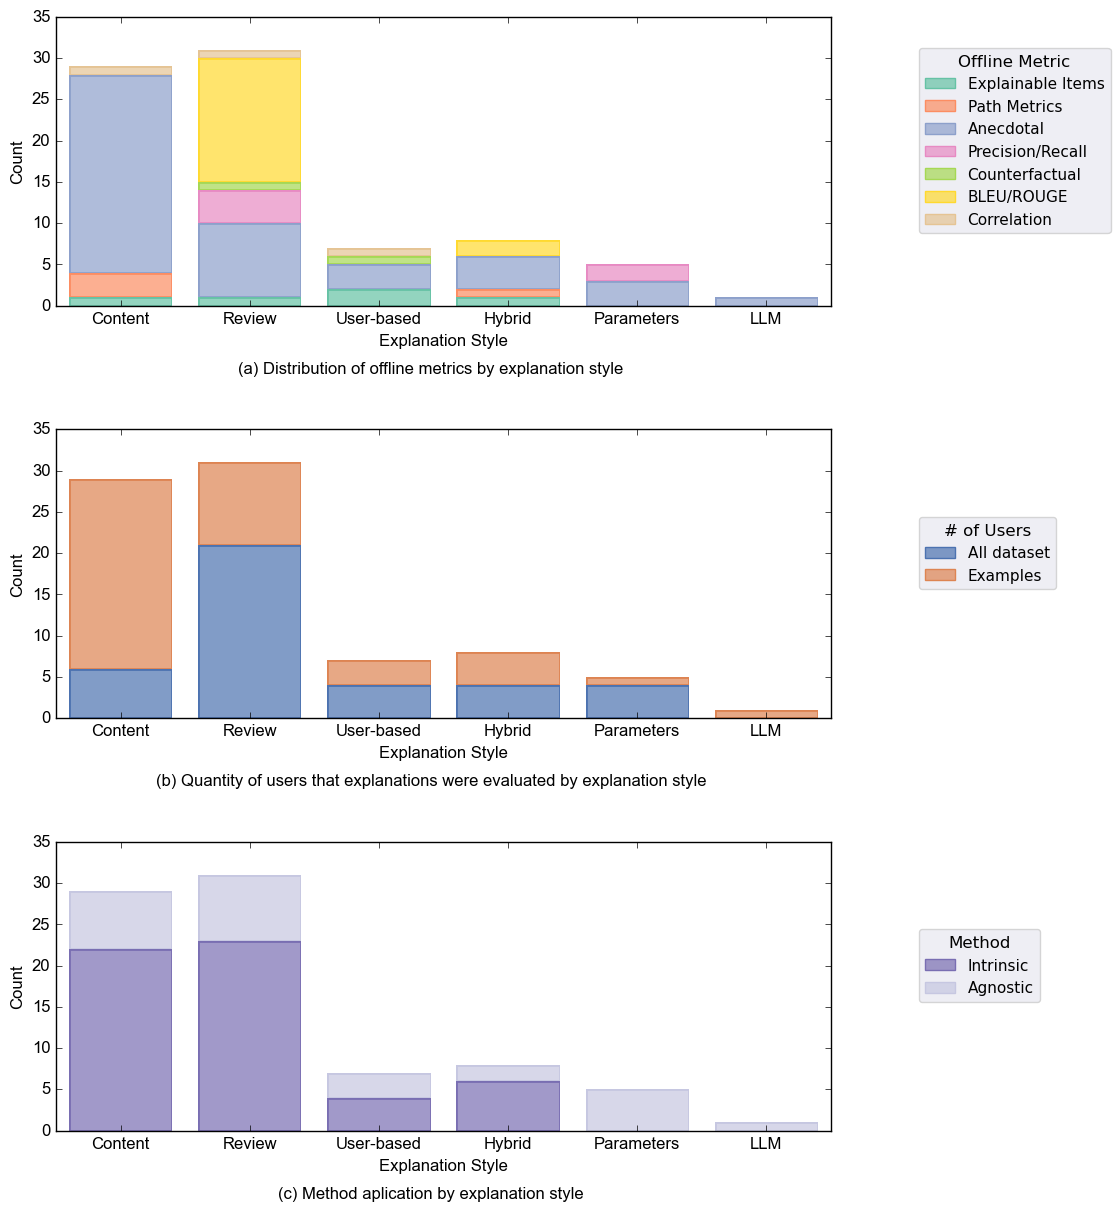

In [13]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn.objects as so
from seaborn import axes_style

plt.close('all')
# Custom theme
theme_dict = {**axes_style("white"), "grid.linestyle": ":"}

# Create main figure
f = plt.figure(figsize=(10, 12))

plt.style.use('classic')
plt.rcParams.update({"font.family": "Arial"}) 

# Create subfigures
sf1, sf2, sf3 = f.subfigures(3, 1, height_ratios=[1, 1, 1], wspace=0, hspace=0.1)

# Create axes inside subfigures
ax1 = sf1.subplots()
ax2 = sf2.subplots()
ax3 = sf3.subplots()

# First plot
(
    so.Plot(results_off, x="Type", color="Offline Metric")
    .add(so.Bar(), so.Count(), so.Stack())
    .scale(color="Set2")
    .limit(y=(0, 35))
    .on(ax1)  # Assign to ax1
    .plot()
)
ax1.set_xlabel("Explanation Style")  
ax1.set_ylabel("Count")
sf1.text(0.5, -0.07,"(a) Distribution of offline metrics by explanation style", 
         ha="center", fontsize=12)

# Second plot
(
    so.Plot(results_off, x="Type", color="# of Users")
    .add(so.Bar(), so.Count(), so.Stack())
    .limit(y=(0, 35))
    .on(ax2)  # Assign to ax2
    .plot()
)
ax2.set_xlabel("Explanation Style")  
ax2.set_ylabel("Count")
sf2.text(0.5, -0.07, "(b) Quantity of users that explanations were evaluated by explanation style", 
         ha="center", fontsize=12)

(
so.Plot(results_off, x="Type", color="Method")
    .add(so.Bar(), so.Count(), so.Stack())
    .scale(color="Purples_r")
    .limit(y=(0, 35))
    .on(ax3)  # Assign to ax3
    .plot()
)
ax3.set_xlabel("Explanation Style")  
ax3.set_ylabel("Count")
sf3.text(0.5, -0.07, "(c) Method aplication by explanation style", 
         ha="center", fontsize=12)

# Show the plot
plt.show()


In [14]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


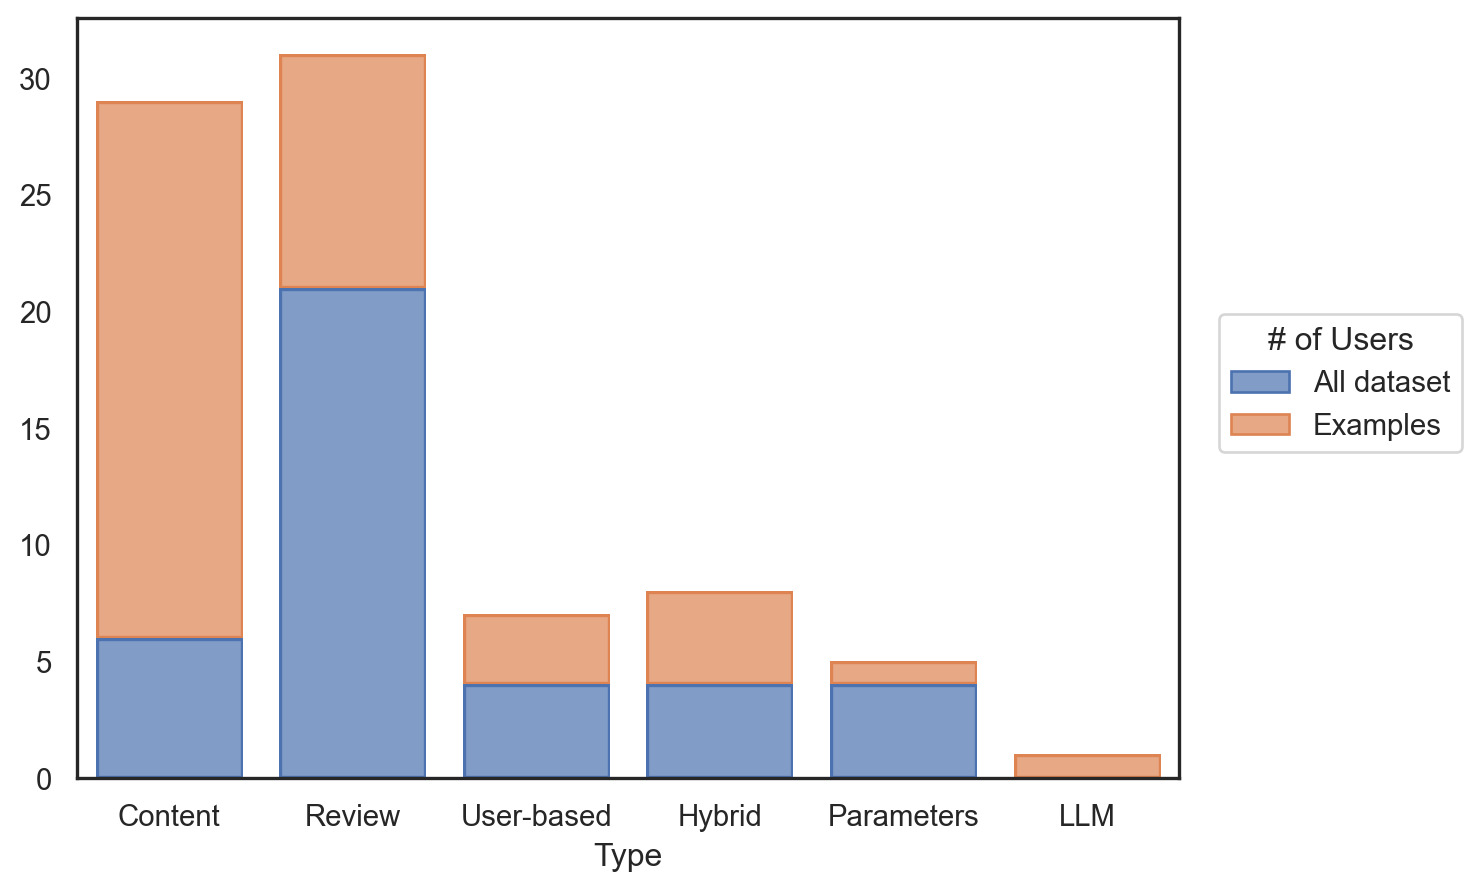

In [15]:
(
    so.Plot(results_off, x="Type", color="# of Users")
    .add(so.Bar(), so.Count(), so.Stack())
    .theme(theme_dict)
    .plot()
)


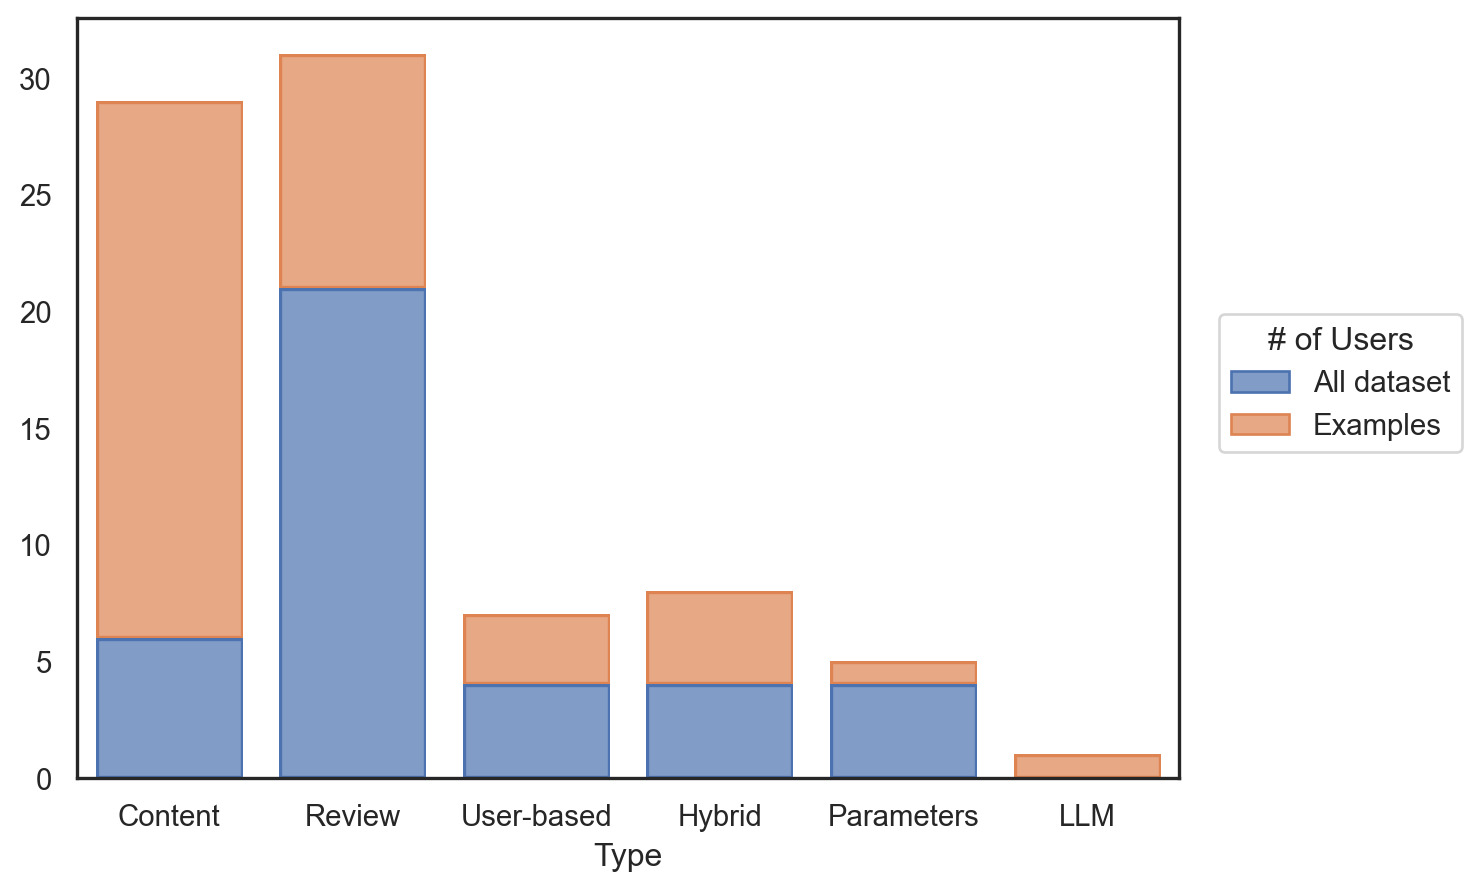

In [16]:
(
so.Plot(results_off, x="Type", color="# of Users")
    .add(so.Bar(), so.Count(), so.Stack())
    .theme(theme_dict)
    .plot()
)

### Generating Latex Table

In [17]:
results.columns

Index(['Number', 'Identifier', 'Title', 'Author', 'Journal or Book', 'Year',
       'Offline', 'Offline Metric', '# of Users', 'Online', 'Online Metric',
       'Type', 'Method'],
      dtype='object')

In [18]:
latex_table_df = results[['Identifier', 'Title', 'Journal or Book', 'Year',
       'Offline', 'Offline Metric',
       '# of Users', 'Online', 'Online Metric',
       'Type', 'Method']]

In [19]:
latex_table_df['Identifier'] = "\cite{" + latex_table_df['Identifier'].astype(str) + "}"

<>:1: SyntaxWarning: invalid escape sequence '\c'
<>:1: SyntaxWarning: invalid escape sequence '\c'
C:\Users\andre\AppData\Local\Temp\ipykernel_13204\2936333895.py:1: SyntaxWarning: invalid escape sequence '\c'
  latex_table_df['Identifier'] = "\cite{" + latex_table_df['Identifier'].astype(str) + "}"
C:\Users\andre\AppData\Local\Temp\ipykernel_13204\2936333895.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  latex_table_df['Identifier'] = "\cite{" + latex_table_df['Identifier'].astype(str) + "}"


In [20]:
latex_table_df['Identifier'] 

0       \cite{takami_flanagan_dai_ogata_2023}
1      \cite{lin_zhang_lin_zeng_zhou_wu_2024}
2          \cite{zanon_da_rocha_manzato_2024}
3              \cite{samih_ghadi_fennan_2023}
4         \cite{li_liu_zhang_kou_liu_qu_2025}
                        ...                  
99             \cite{10.1145/2766462.2767755}
100            \cite{10.1145/3340531.3411992}
101            \cite{10.1145/3292500.3330989}
102            \cite{10.1145/3351095.3372852}
104            \cite{10.1145/3485447.3512031}
Name: Identifier, Length: 103, dtype: object

In [21]:
latex_table_df.columns

Index(['Identifier', 'Title', 'Journal or Book', 'Year', 'Offline',
       'Offline Metric', '# of Users', 'Online', 'Online Metric', 'Type',
       'Method'],
      dtype='object')

In [22]:
latex_table_df.columns = ['Citation', 'Title', 'Journal or Book', 'Year', 'Offline',
       'Offline Metric', '# of Users', 'Online', 'Online Metric', 'Type',
       'Method']

In [23]:
latex_table_df

,Citation,Title,Journal or Book,Year,Offline,Offline Metric,# of Users,Online,Online Metric,Type,Method
0,\cite{takami_flanagan_dai_ogata_2023},Personality-based tailored explainable recomme...,Smart Learning Environments,2023,No,-,-,Yes,CTR,Personality,Agnostic
1,\cite{lin_zhang_lin_zeng_zhou_wu_2024},Knowledge-aware reasoning with self-supervised...,Neural Computing and Applications,2024,Yes,Explainable Items,All dataset,No,-,Content,Intrinsic
2,\cite{zanon_da_rocha_manzato_2024},Model-Agnostic Knowledge Graph Embedding Expla...,Communications in Computer and Information Sci...,2024,Yes,Path Metrics,All dataset,No,-,Content,Agnostic
3,\cite{samih_ghadi_fennan_2023},Knowledge Embeddings for Explainable Recommend...,Lecture Notes in Networks and Systems,2023,Yes,Anecdotal,Examples,No,-,Content,Agnostic
4,\cite{li_liu_zhang_kou_liu_qu_2025},Integrating User Sentiment and Behavior for Ex...,Communications in Computer and Information Sci...,2025,Yes,Precision/Recall,Examples,No,-,Review,Agnostic
...,...,...,...,...,...,...,...,...,...,...,...
99,\cite{10.1145/2766462.2767755},Image-Based Recommendations on Styles and Subs...,ACM SIGIR Conference on Research and Developme...,2015,Yes,Anecdotal,Examples,No,-,Hybrid,Intrinsic
100,\cite{10.1145/3340531.3411992},Generate Neural Template Explanations for Reco...,ACM International Conference on Information an...,2020,Yes,BLEU/ROUGE,All dataset,No,-,Review,Intrinsic
101,\cite{10.1145/3292500.3330989},KGAT: Knowledge Graph Attention Network for Re...,ACM International Conference on Information an...,2019,Yes,Anecdotal,Examples,No,-,Content,Intrinsic
102,\cite{10.1145/3351095.3372852},Effect of confidence and explanation on accura...,"Conference on Fairness, Accountability, and Tr...",2020,No,-,-,Yes,CTR,Parameters,Agnostic


In [24]:
latex_table_df = latex_table_df[['Citation', 'Type', 'Method', 'Offline', 'Offline Metric',
       '# of Users', 'Online', 'Online Metric']]

In [25]:
latex_table_df

,Citation,Type,Method,Offline,Offline Metric,# of Users,Online,Online Metric
0,\cite{takami_flanagan_dai_ogata_2023},Personality,Agnostic,No,-,-,Yes,CTR
1,\cite{lin_zhang_lin_zeng_zhou_wu_2024},Content,Intrinsic,Yes,Explainable Items,All dataset,No,-
2,\cite{zanon_da_rocha_manzato_2024},Content,Agnostic,Yes,Path Metrics,All dataset,No,-
3,\cite{samih_ghadi_fennan_2023},Content,Agnostic,Yes,Anecdotal,Examples,No,-
4,\cite{li_liu_zhang_kou_liu_qu_2025},Review,Agnostic,Yes,Precision/Recall,Examples,No,-
...,...,...,...,...,...,...,...,...
99,\cite{10.1145/2766462.2767755},Hybrid,Intrinsic,Yes,Anecdotal,Examples,No,-
100,\cite{10.1145/3340531.3411992},Review,Intrinsic,Yes,BLEU/ROUGE,All dataset,No,-
101,\cite{10.1145/3292500.3330989},Content,Intrinsic,Yes,Anecdotal,Examples,No,-
102,\cite{10.1145/3351095.3372852},Parameters,Agnostic,No,-,-,Yes,CTR


In [26]:
latex_table_df.to_latex("./results_table.tex", index=False)

In [27]:
latex_table_df[(latex_table_df["Type"] == "Content") & (latex_table_df["Offline"] == "Yes")]

,Citation,Type,Method,Offline,Offline Metric,# of Users,Online,Online Metric
1,\cite{lin_zhang_lin_zeng_zhou_wu_2024},Content,Intrinsic,Yes,Explainable Items,All dataset,No,-
2,\cite{zanon_da_rocha_manzato_2024},Content,Agnostic,Yes,Path Metrics,All dataset,No,-
3,\cite{samih_ghadi_fennan_2023},Content,Agnostic,Yes,Anecdotal,Examples,No,-
11,\cite{zheng_chen_cao_peng_huang_2024},Content,Intrinsic,Yes,Anecdotal,Examples,No,-
12,\cite{wang_xie_ding_chen_xiang_2025},Content,Intrinsic,Yes,Anecdotal,Examples,No,-
13,\cite{sang_yang_zhang_liao_2025},Content,Intrinsic,Yes,Anecdotal,Examples,No,-
17,\cite{9607106},Content,Intrinsic,Yes,Anecdotal,Examples,No,-
19,\cite{10776491},Content,Agnostic,Yes,Anecdotal,Examples,No,-
22,\cite{10683822},Content,Agnostic,Yes,Anecdotal,Examples,No,-
32,\cite{10334552},Content,Intrinsic,Yes,Path Metrics,All dataset,No,-


In [28]:
latex_table_df[(latex_table_df["Type"] == "Content") & (latex_table_df["Offline Metric"] == "Anecdotal") & (latex_table_df["Offline"] == "Yes")]

,Citation,Type,Method,Offline,Offline Metric,# of Users,Online,Online Metric
3,\cite{samih_ghadi_fennan_2023},Content,Agnostic,Yes,Anecdotal,Examples,No,-
11,\cite{zheng_chen_cao_peng_huang_2024},Content,Intrinsic,Yes,Anecdotal,Examples,No,-
12,\cite{wang_xie_ding_chen_xiang_2025},Content,Intrinsic,Yes,Anecdotal,Examples,No,-
13,\cite{sang_yang_zhang_liao_2025},Content,Intrinsic,Yes,Anecdotal,Examples,No,-
17,\cite{9607106},Content,Intrinsic,Yes,Anecdotal,Examples,No,-
19,\cite{10776491},Content,Agnostic,Yes,Anecdotal,Examples,No,-
22,\cite{10683822},Content,Agnostic,Yes,Anecdotal,Examples,No,-
35,\cite{10742303},Content,Intrinsic,Yes,Anecdotal,Examples,No,-
36,\cite{10623784},Content,Agnostic,Yes,Anecdotal,Examples,No,-
38,\cite{SHIMIZU2022107970},Content,Intrinsic,Yes,Anecdotal,Examples,No,-


In [29]:
latex_table_df[(latex_table_df["Type"] == "Content") & (latex_table_df["Offline"] == "Yes")]

,Citation,Type,Method,Offline,Offline Metric,# of Users,Online,Online Metric
1,\cite{lin_zhang_lin_zeng_zhou_wu_2024},Content,Intrinsic,Yes,Explainable Items,All dataset,No,-
2,\cite{zanon_da_rocha_manzato_2024},Content,Agnostic,Yes,Path Metrics,All dataset,No,-
3,\cite{samih_ghadi_fennan_2023},Content,Agnostic,Yes,Anecdotal,Examples,No,-
11,\cite{zheng_chen_cao_peng_huang_2024},Content,Intrinsic,Yes,Anecdotal,Examples,No,-
12,\cite{wang_xie_ding_chen_xiang_2025},Content,Intrinsic,Yes,Anecdotal,Examples,No,-
13,\cite{sang_yang_zhang_liao_2025},Content,Intrinsic,Yes,Anecdotal,Examples,No,-
17,\cite{9607106},Content,Intrinsic,Yes,Anecdotal,Examples,No,-
19,\cite{10776491},Content,Agnostic,Yes,Anecdotal,Examples,No,-
22,\cite{10683822},Content,Agnostic,Yes,Anecdotal,Examples,No,-
32,\cite{10334552},Content,Intrinsic,Yes,Path Metrics,All dataset,No,-


In [30]:
latex_table_df[(latex_table_df["Type"] == "Content") & (latex_table_df["Offline Metric"] != "Anecdotal") & (latex_table_df["Offline"] == "Yes")]

,Citation,Type,Method,Offline,Offline Metric,# of Users,Online,Online Metric
1,\cite{lin_zhang_lin_zeng_zhou_wu_2024},Content,Intrinsic,Yes,Explainable Items,All dataset,No,-
2,\cite{zanon_da_rocha_manzato_2024},Content,Agnostic,Yes,Path Metrics,All dataset,No,-
32,\cite{10334552},Content,Intrinsic,Yes,Path Metrics,All dataset,No,-
60,\cite{10.1145/3357384.3357925},Content,Intrinsic,Yes,Correlation,All dataset,No,-
97,\cite{balloccu_boratto_fenu_marras_2023},Content,Agnostic,Yes,Path Metrics,All dataset,No,-


In [31]:
latex_table_df[(latex_table_df["Online"] == "Yes")]

,Citation,Type,Method,Offline,Offline Metric,# of Users,Online,Online Metric
0,\cite{takami_flanagan_dai_ogata_2023},Personality,Agnostic,No,-,-,Yes,CTR
8,\cite{zhong_negre_2022},Review,Intrinsic,No,-,-,Yes,User Trial
21,\cite{10260804},Content,Intrinsic,No,-,-,Yes,User Trial
26,\cite{8594883},Review,Agnostic,Yes,Correlation,All dataset,Yes,CTR
27,\cite{10048787},User-based,Intrinsic,Yes,Anecdotal,Examples,Yes,-
43,\cite{LIU2020102099},Hybrid,Intrinsic,Yes,Anecdotal,Examples,Yes,User Trial
74,\cite{10.1145/3631700.3665226},Content,Intrinsic,No,-,-,Yes,User Trial
81,\cite{10.1145/3636555.3636898},Content,Intrinsic,No,-,-,Yes,User Trial
82,\cite{10.1145/3616855.3635855},User-based,Agnostic,No,-,-,Yes,CTR
84,\cite{rana_daddio_manzato_bridge_2022},Review,Intrinsic,No,-,-,Yes,CTR


In [32]:
latex_table_df.groupby("Offline Metric").count().sort_values(latex_table_df.columns[0], ascending=False)

,Citation,Type,Method,Offline,# of Users,Online,Online Metric
Offline Metric,,,,,,,
Anecdotal,44,44,44,44,44,44,44
-,21,21,21,21,21,21,21
BLEU/ROUGE,17,17,17,17,17,17,17
Precision/Recall,6,6,6,6,6,6,6
Explainable Items,5,5,5,5,5,5,5
Path Metrics,5,5,5,5,5,5,5
Correlation,3,3,3,3,3,3,3
Counterfactual,2,2,2,2,2,2,2


In [33]:
latex_table_df[(latex_table_df["Offline Metric"] == "-")]

,Citation,Type,Method,Offline,Offline Metric,# of Users,Online,Online Metric
0,\cite{takami_flanagan_dai_ogata_2023},Personality,Agnostic,No,-,-,Yes,CTR
8,\cite{zhong_negre_2022},Review,Intrinsic,No,-,-,Yes,User Trial
14,\cite{9811151},Review,Intrinsic,No,-,-,No,-
21,\cite{10260804},Content,Intrinsic,No,-,-,Yes,User Trial
45,\cite{ZANON2022109333},Content,Agnostic,No,-,-,No,-
46,\cite{PAZRUZA2024102497},Hybrid,Intrinsic,No,-,-,No,-
48,\cite{WEI2023202},Hybrid,Intrinsic,No,-,-,No,-
49,\cite{KAUR2023100507},Content,Intrinsic,No,-,-,No,-
51,\cite{LI2024112042},Content,Intrinsic,No,-,-,No,-
52,\cite{WANG2020436},Content,Intrinsic,No,-,-,No,-


In [34]:
latex_table_df[(latex_table_df["Offline"] == "Yes")]

,Citation,Type,Method,Offline,Offline Metric,# of Users,Online,Online Metric
1,\cite{lin_zhang_lin_zeng_zhou_wu_2024},Content,Intrinsic,Yes,Explainable Items,All dataset,No,-
2,\cite{zanon_da_rocha_manzato_2024},Content,Agnostic,Yes,Path Metrics,All dataset,No,-
3,\cite{samih_ghadi_fennan_2023},Content,Agnostic,Yes,Anecdotal,Examples,No,-
4,\cite{li_liu_zhang_kou_liu_qu_2025},Review,Agnostic,Yes,Precision/Recall,Examples,No,-
5,\cite{wen_liu_jing_yu_2024},User-based,Agnostic,Yes,Counterfactual,All dataset,No,-
...,...,...,...,...,...,...,...,...
98,\cite{WU2024111133},Review,Intrinsic,Yes,BLEU/ROUGE,All dataset,No,-
99,\cite{10.1145/2766462.2767755},Hybrid,Intrinsic,Yes,Anecdotal,Examples,No,-
100,\cite{10.1145/3340531.3411992},Review,Intrinsic,Yes,BLEU/ROUGE,All dataset,No,-
101,\cite{10.1145/3292500.3330989},Content,Intrinsic,Yes,Anecdotal,Examples,No,-


In [35]:
latex_table_df[(latex_table_df["Offline"] == "No")]

,Citation,Type,Method,Offline,Offline Metric,# of Users,Online,Online Metric
0,\cite{takami_flanagan_dai_ogata_2023},Personality,Agnostic,No,-,-,Yes,CTR
8,\cite{zhong_negre_2022},Review,Intrinsic,No,-,-,Yes,User Trial
14,\cite{9811151},Review,Intrinsic,No,-,-,No,-
21,\cite{10260804},Content,Intrinsic,No,-,-,Yes,User Trial
45,\cite{ZANON2022109333},Content,Agnostic,No,-,-,No,-
46,\cite{PAZRUZA2024102497},Hybrid,Intrinsic,No,-,-,No,-
48,\cite{WEI2023202},Hybrid,Intrinsic,No,-,-,No,-
49,\cite{KAUR2023100507},Content,Intrinsic,No,-,-,No,-
51,\cite{LI2024112042},Content,Intrinsic,No,-,-,No,-
52,\cite{WANG2020436},Content,Intrinsic,No,-,-,No,-


In [36]:
latex_table_df[(latex_table_df["Offline Metric"] == "Anecdotal") & (latex_table_df["# of Users"] != "Examples")]

,Citation,Type,Method,Offline,Offline Metric,# of Users,Online,Online Metric
33,\cite{10825771},Parameters,Agnostic,Yes,Anecdotal,All dataset,No,-
34,\cite{10308154},Parameters,Agnostic,Yes,Anecdotal,All dataset,No,-
94,\cite{LI2025110542},Content,Intrinsic,Yes,Anecdotal,All dataset,No,-


In [37]:
latex_table_df[(latex_table_df["Method"] == "Intrinsic")]

,Citation,Type,Method,Offline,Offline Metric,# of Users,Online,Online Metric
1,\cite{lin_zhang_lin_zeng_zhou_wu_2024},Content,Intrinsic,Yes,Explainable Items,All dataset,No,-
8,\cite{zhong_negre_2022},Review,Intrinsic,No,-,-,Yes,User Trial
10,\cite{zhang_zhu_wang_2023},User-based,Intrinsic,Yes,Explainable Items,All dataset,No,-
11,\cite{zheng_chen_cao_peng_huang_2024},Content,Intrinsic,Yes,Anecdotal,Examples,No,-
12,\cite{wang_xie_ding_chen_xiang_2025},Content,Intrinsic,Yes,Anecdotal,Examples,No,-
...,...,...,...,...,...,...,...,...
98,\cite{WU2024111133},Review,Intrinsic,Yes,BLEU/ROUGE,All dataset,No,-
99,\cite{10.1145/2766462.2767755},Hybrid,Intrinsic,Yes,Anecdotal,Examples,No,-
100,\cite{10.1145/3340531.3411992},Review,Intrinsic,Yes,BLEU/ROUGE,All dataset,No,-
101,\cite{10.1145/3292500.3330989},Content,Intrinsic,Yes,Anecdotal,Examples,No,-


In [38]:
latex_table_df[(latex_table_df["Method"] == "Intrinsic") & (latex_table_df["Offline"] == "No") & (latex_table_df["Online"] == "No")]

,Citation,Type,Method,Offline,Offline Metric,# of Users,Online,Online Metric
14,\cite{9811151},Review,Intrinsic,No,-,-,No,-
46,\cite{PAZRUZA2024102497},Hybrid,Intrinsic,No,-,-,No,-
48,\cite{WEI2023202},Hybrid,Intrinsic,No,-,-,No,-
49,\cite{KAUR2023100507},Content,Intrinsic,No,-,-,No,-
51,\cite{LI2024112042},Content,Intrinsic,No,-,-,No,-
52,\cite{WANG2020436},Content,Intrinsic,No,-,-,No,-
56,\cite{LIU2025113217},Content,Intrinsic,No,-,-,No,-
72,\cite{10.1145/3178876.3186154},User-based,Intrinsic,No,-,-,No,-


In [39]:
latex_table_df[(latex_table_df["Online"] == "Yes")]

,Citation,Type,Method,Offline,Offline Metric,# of Users,Online,Online Metric
0,\cite{takami_flanagan_dai_ogata_2023},Personality,Agnostic,No,-,-,Yes,CTR
8,\cite{zhong_negre_2022},Review,Intrinsic,No,-,-,Yes,User Trial
21,\cite{10260804},Content,Intrinsic,No,-,-,Yes,User Trial
26,\cite{8594883},Review,Agnostic,Yes,Correlation,All dataset,Yes,CTR
27,\cite{10048787},User-based,Intrinsic,Yes,Anecdotal,Examples,Yes,-
43,\cite{LIU2020102099},Hybrid,Intrinsic,Yes,Anecdotal,Examples,Yes,User Trial
74,\cite{10.1145/3631700.3665226},Content,Intrinsic,No,-,-,Yes,User Trial
81,\cite{10.1145/3636555.3636898},Content,Intrinsic,No,-,-,Yes,User Trial
82,\cite{10.1145/3616855.3635855},User-based,Agnostic,No,-,-,Yes,CTR
84,\cite{rana_daddio_manzato_bridge_2022},Review,Intrinsic,No,-,-,Yes,CTR
